In [17]:
import os
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [18]:
origem = Path("/home/seixas/Imagens/ima_tray")

##### 

In [3]:
base_dir = Path("face_dataset")
(train_img_dir := base_dir / "images/train").mkdir(parents=True, exist_ok=True)
(val_img_dir := base_dir / "images/val").mkdir(parents=True, exist_ok=True)
(train_lbl_dir := base_dir / "labels/train").mkdir(parents=True, exist_ok=True)
(val_lbl_dir := base_dir / "labels/val").mkdir(parents=True, exist_ok=True)

In [19]:
ase_dir = Path("face_dataset")
(train_img_dir := base_dir / "images/train").mkdir(parents=True, exist_ok=True)
(val_img_dir := base_dir / "images/val").mkdir(parents=True, exist_ok=True)
(train_lbl_dir := base_dir / "labels/train").mkdir(parents=True, exist_ok=True)
(val_lbl_dir := base_dir / "labels/val").mkdir(parents=True, exist_ok=True)


In [22]:
origem = Path("/home/seixas/Imagens/ima_tray")

base_dir = Path("face_dataset")
(train_img_dir := base_dir / "images/train").mkdir(parents=True, exist_ok=True)
(val_img_dir := base_dir / "images/val").mkdir(parents=True, exist_ok=True)
(train_lbl_dir := base_dir / "labels/train").mkdir(parents=True, exist_ok=True)
(val_lbl_dir := base_dir / "labels/val").mkdir(parents=True, exist_ok=True)

all_images = list(origem.glob("*.jpg"))
print(f"Total de imagens encontradas: {len(all_images)}")

for i, img_path in enumerate(all_images):
    target = train_img_dir if i < len(all_images)*0.8 else val_img_dir
    shutil.copy(img_path, target / img_path.name)

print("Imagens treino:", len(list(train_img_dir.glob('*.jpg'))))
print("Imagens val:", len(list(val_img_dir.glob('*.jpg'))))

Total de imagens encontradas: 40
Imagens treino: 32
Imagens val: 8


In [23]:
dataset_yaml = """
path: face_dataset
train: images/train
val: images/val
names: [face]
"""

with open("face_dataset/dataset.yaml", "w") as f:
    f.write(dataset_yaml)


In [24]:
# Criar uma label dummy: um rosto no centro
def criar_label(imagem, pasta_rotulo):
    nome = imagem.stem + ".txt"
    path_label = pasta_rotulo / nome
    with open(path_label, "w") as f:
        # Classe 0, centro (x=0.5, y=0.5), largura 0.3, altura 0.3 (formato YOLO)
        f.write("0 0.5 0.5 0.3 0.3\n")

for img in train_img_dir.glob("*.jpg"):
    criar_label(img, train_lbl_dir)

for img in val_img_dir.glob("*.jpg"):
    criar_label(img, val_lbl_dir)


In [25]:
from pathlib import Path

print("Treino:", len(list(Path("face_dataset/images/train").glob("*.jpg"))))
print("Validação:", len(list(Path("face_dataset/images/val").glob("*.jpg"))))
print("Train labels:", len(list(Path("face_dataset/labels/train").glob("*.txt"))))
print("Val labels:", len(list(Path("face_dataset/labels/val").glob("*.txt"))))


Treino: 32
Validação: 8
Train labels: 32
Val labels: 8


In [26]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Modelo base
model.train(data="face_dataset/dataset.yaml", epochs=10, imgsz=640)


100%|███████████████████████████████████████| 6.25M/6.25M [00:07<00:00, 872kB/s]


Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=face_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

[W720 18:32:40.548978890 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.563640745 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.573463140 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.588995924 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.601158890 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.603428809 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.606400487 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.608649461 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.610758376 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:40.613027093 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:3

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3168.0±1035.1 MB/s, size: 220.0 KB)


[W720 18:32:41.286461359 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.291285471 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.293001455 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.293744163 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.294341455 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.294953572 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.295492978 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.296066057 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.296641533 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:32:41.297388839 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:3

train: New cache created: /home/seixas/Imagens/ima_tray/face_dataset/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3798.1±1317.5 MB/s, size: 345.5 KB)



/home/seixas/.local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /home/seixas/Imagens/ima_tray/face_dataset/labels/val... 8 images,

val: New cache created: /home/seixas/Imagens/ima_tray/face_dataset/labels/val.cache



/home/seixas/.local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/home/seixas/.local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
       1/10         0G      3.877      6.329      3.862         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:33:40.422463780 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:33:40.722644187 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:33:41.968617819 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:33:41.237575438 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:33:41.387127201 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:33:41.554006597 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:33:41

                   all          8          8     0.0025       0.75    0.00433   0.000601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.506      6.415      3.574         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:34:22.386473657 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:22.652907608 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:22.859602305 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:23.092648536 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:23.223687576 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:23.369286257 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:23.473137087 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:23.542374394 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:34:23.585125933 NNPACK.cpp:57] Could n

                   all          8          8     0.0025       0.75    0.00658   0.000814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.249      5.718      3.379         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:35:00.549561262 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:00.836909413 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.072645282 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.290436385 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.426575252 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.567246491 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.667216685 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.730938054 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:01.765904889 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1     0.0159    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.095       5.55      3.137         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:35:39.342425826 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:39.604589952 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:39.813843772 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:40.038782113 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:40.168966080 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:40.304358323 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:40.392829768 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:40.454534642 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:35:40.488039970 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1     0.0141    0.00334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.036      5.458      2.885         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:36:17.271678944 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:17.544410767 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.751773356 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.980774500 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.117149605 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.264787985 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.358759876 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.424360866 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:18.460839246 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1     0.0156    0.00384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.754      5.344      2.751         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:36:57.065152084 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:57.320236639 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:57.522546472 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:58.750495703 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:58.881392980 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:58.018051064 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:58.107645689 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:58.167847395 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:36:58.201693263 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1     0.0223     0.0046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.661      4.897      2.677         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:37:41.248266248 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:41.567800489 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:42.837565641 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:42.098749686 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:42.259438865 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:42.461824184 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:42.569300270 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:43.655104205 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:37:43.697595232 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1     0.0301    0.00713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.481      4.929      2.496         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:38:26.948189942 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:26.255034115 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.492214076 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.738204756 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.886457758 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.051059209 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.156042793 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.229211542 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:38:27.269313350 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1     0.0796      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.381       4.57       2.48         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:39:11.177626842 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:12.492948583 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:12.721406984 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:12.009862158 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:12.161149038 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:12.330776442 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:13.437050247 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:13.509022184 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:13.550590966 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1      0.096     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.366      4.591      2.404         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m[W720 18:39:57.483724173 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:57.780985138 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:57.005520483 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:57.292574697 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:58.441704525 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:58.597596102 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:58.700039391 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:58.769760164 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:39:58.811639401 NNPACK.cpp:57] Could n

                   all          8          8    0.00333          1        0.1     0.0161



10 epochs completed in 0.118 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


[W720 18:40:02.529897020 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.532280794 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.532859395 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.533476686 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.534003271 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.534624808 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.537126219 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.538077890 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.538850188 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:40:02.540350387 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:4

                   all          8          8    0.00333          1        0.1     0.0161
Speed: 2.1ms preprocess, 436.4ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f039f02900>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [27]:
from ultralytics import YOLO
from pathlib import Path

# Carregar modelo treinado
model = YOLO("runs/detect/train/weights/best.pt")

# Rodar predições em todas as imagens de validação
val_imgs = list(Path("face_dataset/images/val").glob("*.jpg"))

for img_path in val_imgs:
    results = model(img_path, save=True)  # Salva as imagens com predições


[W720 18:53:56.833742653 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.866024661 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.889477071 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.918853848 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.941436848 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.958391597 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.971799944 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.982270534 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.986640740 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.996166176 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/0001cb734adac2ee.jpg: 480x640 (no detections), 419.9ms
Speed: 2.6ms preprocess, 419.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict



[W720 18:53:56.075096179 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.087045000 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.100459460 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.109393226 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.118668299 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.155124273 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.179808648 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.186867683 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.194509434 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:56.196910775 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/0002024f996741eb.jpg: 448x640 (no detections), 361.9ms
Speed: 2.9ms preprocess, 361.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict



[W720 18:53:57.495551929 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.509290352 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.519310976 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.527261252 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.535490583 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.563322152 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.586253295 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.593617433 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.600668921 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.603266345 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/0000253ea4ecbf19.jpg: 480x640 (no detections), 396.3ms
Speed: 4.6ms preprocess, 396.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict



[W720 18:53:57.917740348 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.930576542 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.939718879 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.949519731 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.975200905 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.998971618 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.007297296 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.015007032 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.017089709 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.018888036 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/000161230ca61936.jpg: 448x640 (no detections), 452.9ms
Speed: 2.6ms preprocess, 452.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict



[W720 18:53:57.415279432 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:57.431334772 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.444092637 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.454290011 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.464686053 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.490093032 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.515381614 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.522051773 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.533394626 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.539416483 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/0001b46b0b82ee29.jpg: 448x640 (no detections), 387.7ms
Speed: 2.4ms preprocess, 387.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict



[W720 18:53:58.856522847 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.864437973 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.872566588 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.897956825 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.924918754 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.937942833 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.945636439 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.947578592 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.949242003 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.951196018 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/0002347a67b7a730.jpg: 448x640 (no detections), 392.9ms
Speed: 9.6ms preprocess, 392.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict



[W720 18:53:58.313697625 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.336330453 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.357889560 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.364972438 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.371599934 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.374429797 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.376376811 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.378379693 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.379974675 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:58.387344221 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/000213ca46979b73.jpg: 448x640 (no detections), 368.0ms
Speed: 3.9ms preprocess, 368.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict



[W720 18:53:59.755617612 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.762929883 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.764889086 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.766544293 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.768414791 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.770133730 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.779247760 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.843634875 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.872832271 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.894549729 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:5

image 1/1 /home/seixas/Imagens/ima_tray/face_dataset/images/val/00013f14dd4e168f.jpg: 448x640 (no detections), 451.5ms
Speed: 2.4ms preprocess, 451.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[W720 18:53:59.198465682 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.211569174 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.230321945 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.232401463 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.234154150 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.236130443 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.237783233 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W720 18:53:59.255670394 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.


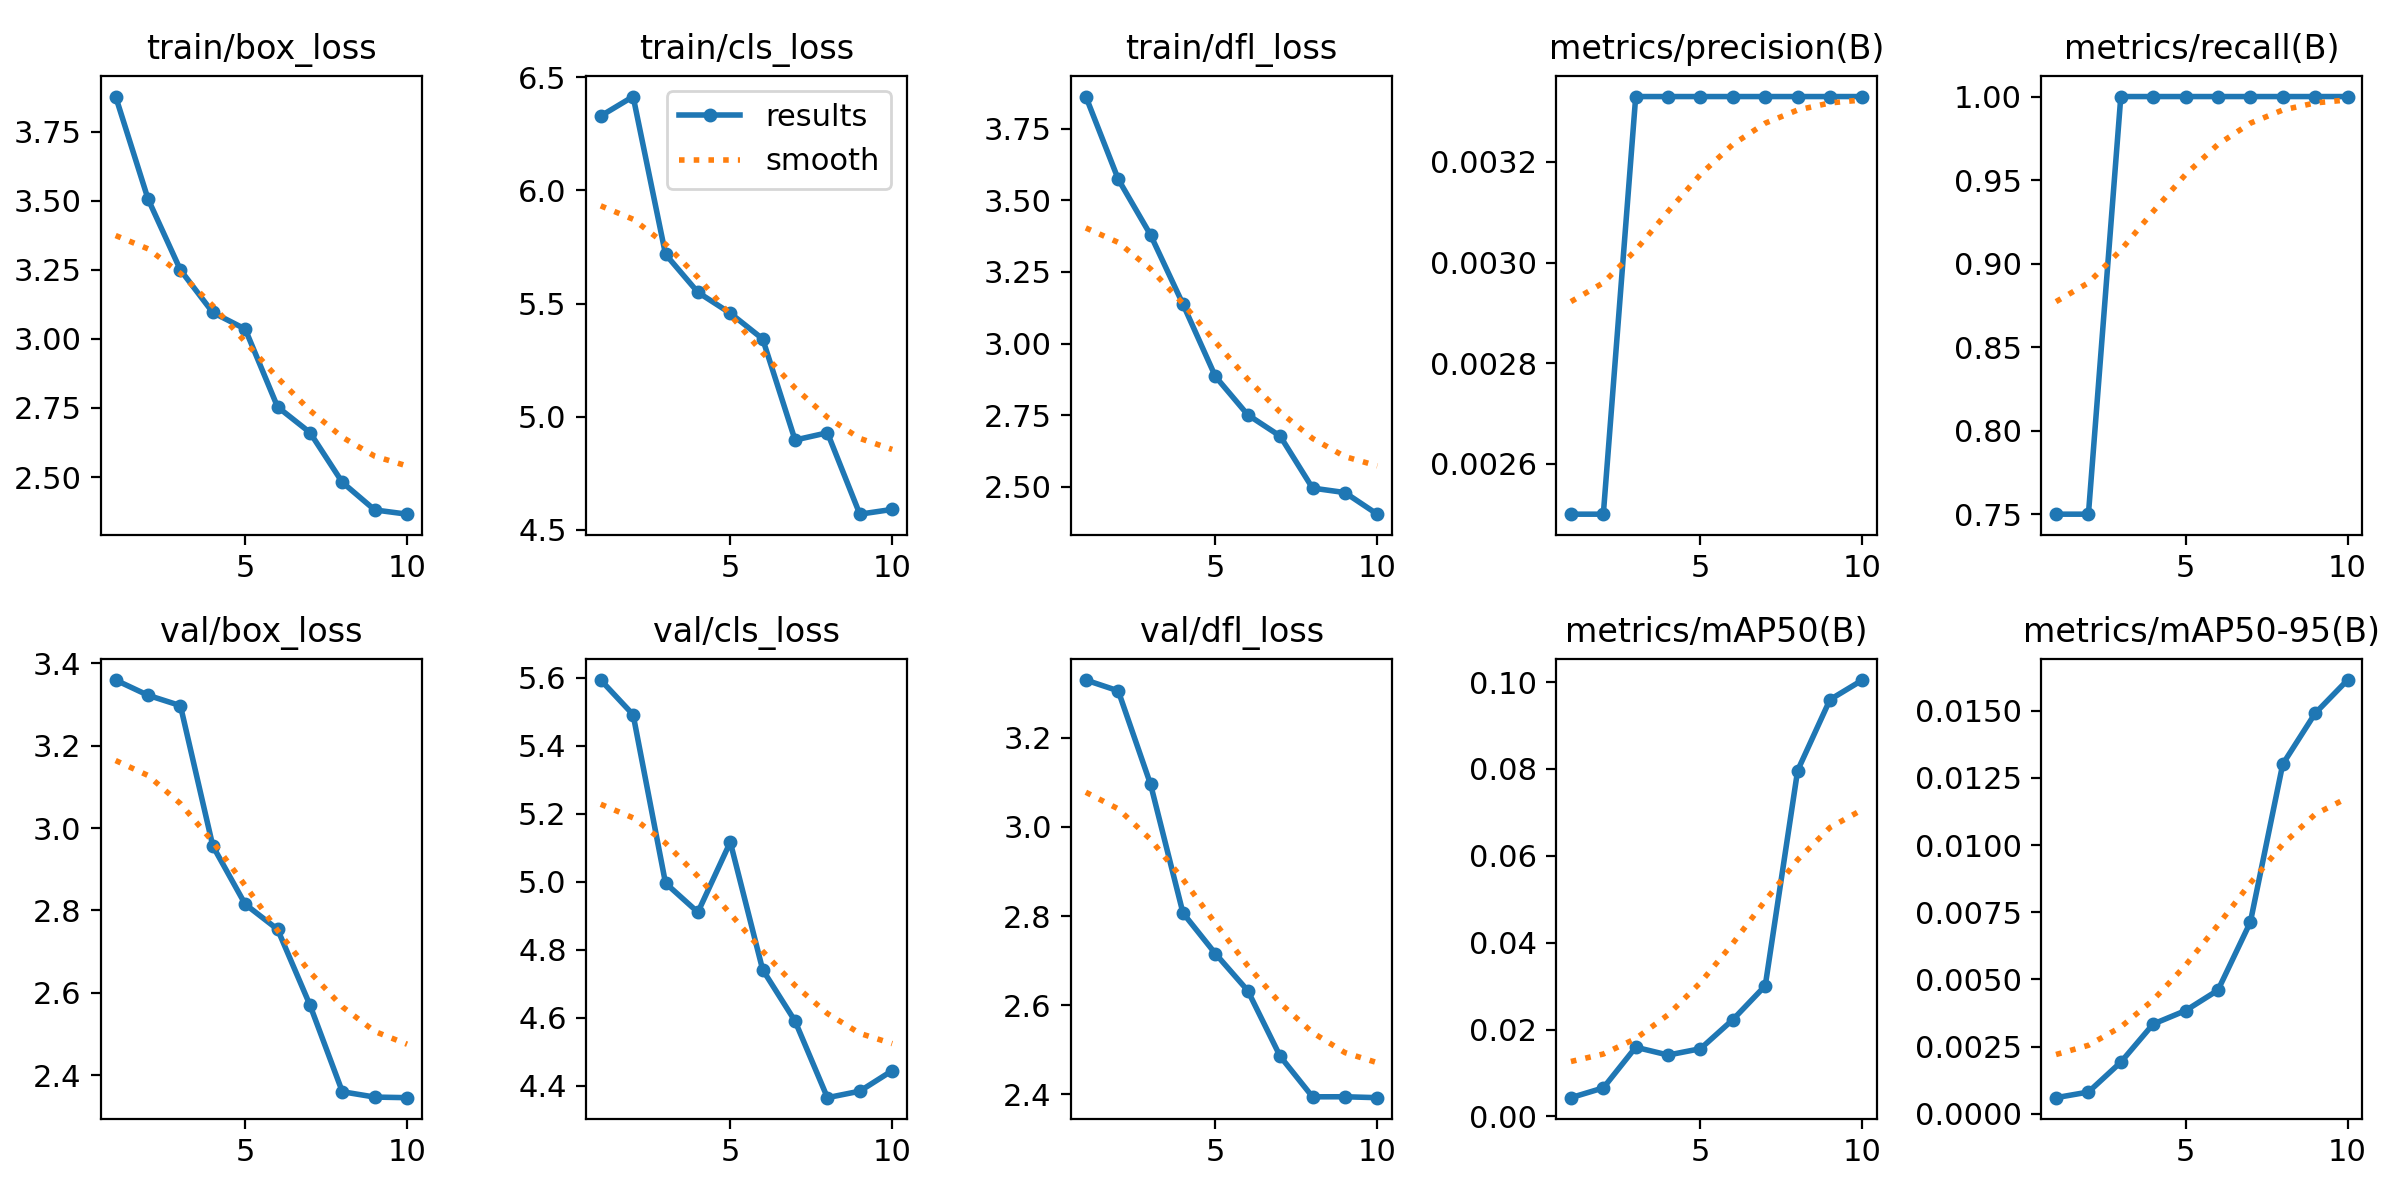

In [30]:
from IPython.display import Image, display
from pathlib import Path

result_dir = Path("runs/detect/train")

# Mostrar gráfico de perda (loss)
display(Image(filename=result_dir / "results.png"))
